In [1]:
import pandas as pd
from lobsteronaws.lobster.order_book import OrderBook
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline


Load the parquet files. Please be aware that ``pandas`` will load all files in the directory into memory. <span style="color:red"> So if you are working on a machine with a small memeory, please consider to delete some parquet files. </span>

In [2]:
order_book_parquet_directory = "/home/ruihong/workspace/lobster/ruihong-testing-bucket/demo_pandas/orderbook"
order_books = pd.read_parquet(order_book_parquet_directory, "pyarrow")

Count the number of order books for each stock.

In [3]:
order_books.groupby("symbol")["symbol"].count()

symbol
AAL      348811
AAPL    1110870
ADBE     163073
ADI       92940
ADP       90888
ADSK      80961
ALGN      52947
ALXN      59955
AMAT     413279
Name: symbol, dtype: int64

Work on one symbol.

In [4]:
symbol = "AAPL"
order_book_df = order_books.loc[order_books['symbol'] == symbol, :]
# release some memory
del order_books

Resample in one minute interval.

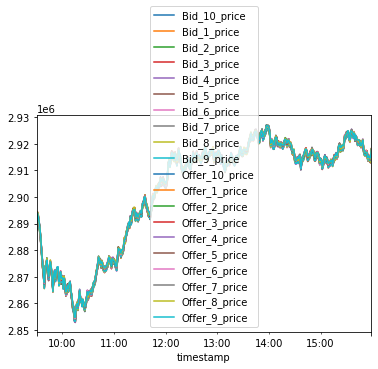

In [6]:
aapl_order_book = OrderBook(order_book_df)
resample_interval_seconds = 60
resample_book = aapl_order_book.resample(resample_interval_seconds)
resample_book.loc[:, aapl_order_book.quote_cols].plot()

Plot the aggregated trades.

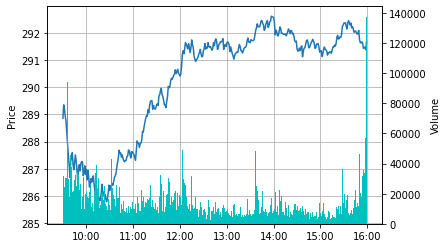

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(resample_book.index.to_series(), resample_book.tradePrice / 1e4, label='Price')
ax.set_ylabel('Price')
ax2 = ax.twinx()
ax2.bar(resample_book.index.to_series(), height=resample_book.tradeSize, width=resample_interval_seconds / (3600 * 24),
        label='Volume', color='c')
ax2.set_ylabel('Volume')
ax.grid()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))